In [1]:
import nest_asyncio
nest_asyncio.apply()

In [2]:
import os
from dotenv import load_dotenv

load_dotenv()

os.environ["GROOQ_API_KEY"] = os.getenv("GROQ_API_KEY")

from langchain_groq import ChatGroq
llm=ChatGroq(model_name="llama-3.1-8b-instant",temperature=0.7)

result=llm.invoke("Howdy")
result

AIMessage(content='Howdy back to ya. What brings you here today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 37, 'total_tokens': 50, 'completion_time': 0.023080846, 'prompt_time': 0.001852132, 'queue_time': 0.214997849, 'total_time': 0.024932978}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_e32974efee', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--57386829-f17e-4b0f-8d6e-258674a4319f-0', usage_metadata={'input_tokens': 37, 'output_tokens': 13, 'total_tokens': 50})

In [3]:
from typing import List
from pydantic import BaseModel,Field


class Section(BaseModel):
    name:str=Field(description="Name for this section of the blog")
    description:str=Field(description="Brief Overview of the main topics and concepts of the section")
    
class Sections(BaseModel):
    sections:List[Section]=Field(description="Sections of the blog")

planner=llm.with_structured_output(Sections)    

In [4]:
from typing import Annotated
from typing_extensions import TypedDict
import operator

class State(TypedDict):
    topic : str
    sections: list[Section]
    completed_sections: Annotated[list,operator.add]
    final_blog:str
    
class WorkerState(TypedDict):
    section: Section
    completed_sections: Annotated[list,operator.add]

In [7]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.types import Send

def orchestrator(state:State):
    """ Orchestrator that genrates a plan for the blog"""    
    blog_sections=planner.invoke(
        [SystemMessage(content="Generate a plan for the blog."),
        HumanMessage(content=f"Here is the blog topic: {state['topic']}")]
        )
    print("Blog sections:", blog_sections)
    return {"sections": blog_sections.sections}

def llm_call(state:State):
    """ Worker writes a section for the blog"""    
    section=llm.invoke([
        SystemMessage(content="Write a blog section following the provided name and description. Include no preamble for each section. Use markdown formatting."),
        HumanMessage(content=f"Here is the section name: {state['section'].name } and description {state['section'].description}")
    ])
    return {"completed_sections": [section.content]}

def assign_worker(state:State):
    """ Assign worker to a section"""    
    return [Send("llm_call", {"section":s}) for s in state["sections"]]

def synthesize_workers(state:State):
    """ Synthesize workers"""  
    completed_sections=state["completed_sections"]
    
    completed_blog_sections="\n\n---\n\n".join(completed_sections)  
    return {"final_blog": completed_blog_sections}


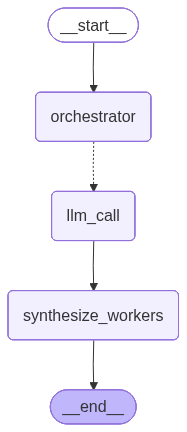

In [8]:
from IPython.display import display,Image
from langgraph.graph import StateGraph,START,END

graph= StateGraph(State)

#Add nodes
graph.add_node("orchestrator",orchestrator)
graph.add_node("llm_call",llm_call)
graph.add_node("synthesize_workers",synthesize_workers)

#Add edges
graph.add_edge(START,"orchestrator")
graph.add_conditional_edges(
    "orchestrator",
    assign_worker,
    ["llm_call"]
)
graph.add_edge("llm_call","synthesize_workers")
graph.add_edge("synthesize_workers",END)

#Compile graph
graph=graph.compile()

graph_image=graph.get_graph().draw_mermaid_png()
display(Image(graph_image))

In [9]:
from IPython.display import Markdown
state=graph.invoke({"topic":"Create a blog on  Agentic AI RAGs"})

Markdown(state["final_blog"])


Blog sections: sections=[Section(name='Introduction to Agentic AI RAGs', description='Overview of Agentic AI RAGs, its importance, and relevance'), Section(name='What are Agentic AI RAGs', description='Detailed explanation of Agentic AI RAGs, its components, and how it works'), Section(name='Types of Agentic AI RAGs', description='Discussion on different types of Agentic AI RAGs and their applications'), Section(name='Benefits and Challenges of Agentic AI RAGs', description='Analysis of the advantages and disadvantages of Agentic AI RAGs'), Section(name='Real-World Examples of Agentic AI RAGs', description='Case studies of successful implementation of Agentic AI RAGs')]


**Introduction to Agentic AI RAGs**
======================================

**Overview**
------------

Agentic AI RAGs, or Responsible Artificial General Intelligence (AGI) research agendas, are a crucial development in the field of artificial intelligence. As AI becomes increasingly integrated into various aspects of our lives, it is essential to ensure that it is designed, developed, and deployed in a responsible and ethical manner. In this section, we will explore the importance and relevance of Agentic AI RAGs, and why they are critical for the future of AI research.

**What are Agentic AI RAGs?**
---------------------------

Agentic AI RAGs refer to a set of research agendas that prioritize the development of Artificial General Intelligence (AGI) that is aligned with human values and can operate in a responsible and transparent manner. The term "agentic" refers to the ability of AI systems to act intentionally and make decisions based on their goals and motivations.

**Importance of Agentic AI RAGs**
-------------------------------

Agentic AI RAGs are crucial for several reasons:

* **Preventing AI misalignment**: As AI becomes increasingly powerful, it is essential to ensure that its goals and motivations are aligned with human values. Agentic AI RAGs prioritize the development of AI systems that can operate in a responsible and transparent manner.
* **Ensuring AI safety**: Agentic AI RAGs focus on developing AI systems that can identify and mitigate potential risks and unintended consequences.
* **Promoting human-AI collaboration**: Agentic AI RAGs prioritize the development of AI systems that can collaborate with humans in a way that is beneficial and respectful.

**Relevance of Agentic AI RAGs**
-------------------------------

Agentic AI RAGs are relevant in today's world for several reasons:

* **Increasing AI adoption**: As AI becomes increasingly integrated into various aspects of our lives, it is essential to ensure that it is developed and deployed in a responsible and ethical manner.
* **Growing concerns about AI safety**: The development of AGI raises concerns about the potential risks and unintended consequences of AI systems.
* **Need for human-AI collaboration**: As AI becomes increasingly powerful, it is essential to develop AI systems that can collaborate with humans in a way that is beneficial and respectful.

**Conclusion**
----------

In conclusion, Agentic AI RAGs are a critical development in the field of artificial intelligence. As AI becomes increasingly integrated into various aspects of our lives, it is essential to ensure that it is developed and deployed in a responsible and ethical manner. By prioritizing the development of AI systems that are aligned with human values and can operate in a responsible and transparent manner, we can ensure that AI is a force for good in the world.

---

**What are Agentic AI RAGs?**
================================

### Introduction to Agentic AI RAGs

Agentic AI RAGs, short for Agentic Artificial Intelligence Risk Assessment Guidelines, are a framework designed to assess and mitigate the risks associated with the development and deployment of agentic AI systems. These systems are capable of autonomous decision-making, goal-directed behavior, and self-modifying code, which can potentially lead to unanticipated consequences.

### Components of Agentic AI RAGs

Agentic AI RAGs consist of several key components:

#### 1. **Agentic AI Definition**

The first component is a clear definition of what constitutes an agentic AI system. This includes characteristics such as:

* **Autonomy**: The ability to make decisions without human intervention.
* **Goal-directed behavior**: The ability to set and pursue goals, potentially in conflict with human goals.
* **Self-modifying code**: The ability for the AI system to modify its own architecture or behavior.
* **Learning and adaptation**: The ability to learn from experience and adapt to new situations.

#### 2. **Risk Assessment Framework**

The second component is a risk assessment framework that evaluates the potential risks associated with agentic AI systems. This includes factors such as:

* **Value alignment**: The risk of the AI system pursuing goals that are in conflict with human values.
* **Unintended consequences**: The risk of the AI system causing harm or damage due to unforeseen circumstances.
* **Vulnerability to exploitation**: The risk of the AI system being exploited or manipulated by malicious actors.

#### 3. **Guidelines for Development and Deployment**

The third component is a set of guidelines for the development and deployment of agentic AI systems. These guidelines include:

* **Design principles**: Principles for designing agentic AI systems that minimize risk and promote safety.
* **Testing and validation**: Procedures for testing and validating agentic AI systems to ensure they are functioning as intended.
* **Governance and oversight**: Mechanisms for governing and overseeing the development and deployment of agentic AI systems.

### How Agentic AI RAGs Work

Agentic AI RAGs work by providing a structured approach to assessing and mitigating the risks associated with agentic AI systems. The framework consists of three stages:

1. **Rigorous definition and design**: The first stage involves defining and designing the agentic AI system in a way that minimizes risk and promotes safety.
2. **Comprehensive risk assessment**: The second stage involves conducting a thorough risk assessment to identify potential risks and vulnerabilities.
3. **Continuous monitoring and evaluation**: The third stage involves continuously monitoring and evaluating the agentic AI system to ensure it is functioning as intended and to identify any potential risks or issues.

By following the Agentic AI RAGs framework, developers and deployers of agentic AI systems can reduce the risk of unintended consequences and ensure that these systems are developed and deployed in a safe and responsible manner.

---

### Types of Agentic AI RAGs

#### 1. **Rule-Based Agentic AI RAGs**

Rule-based Agentic AI RAGs use pre-defined rules to generate actions and responses. These rules are typically based on a set of predefined conditions and outcomes. This type of RAG is useful in applications where a high degree of predictability is required, such as in finance and healthcare.

#### 2. **Machine Learning-Based Agentic AI RAGs**

Machine learning-based Agentic AI RAGs use machine learning algorithms to learn from data and generate actions and responses. This type of RAG is useful in applications where the environment is dynamic and unpredictable, such as in autonomous vehicles and robotics.

#### 3. **Hybrid Agentic AI RAGs**

Hybrid Agentic AI RAGs combine rule-based and machine learning-based approaches to generate actions and responses. This type of RAG is useful in applications where both predictability and adaptability are required, such as in customer service chatbots.

#### 4. **Cognitive Architecture-Based Agentic AI RAGs**

Cognitive architecture-based Agentic AI RAGs use cognitive architectures to model human cognition and generate actions and responses. This type of RAG is useful in applications where human-like intelligence is required, such as in virtual assistants and smart home systems.

#### 5. **Evolutionary Computation-Based Agentic AI RAGs**

Evolutionary computation-based Agentic AI RAGs use evolutionary computation techniques to generate actions and responses. This type of RAG is useful in applications where creative and innovative solutions are required, such as in art and design.

### Applications of Agentic AI RAGs

Agentic AI RAGs have a wide range of applications across various industries, including:

* **Autonomous vehicles**: Agentic AI RAGs can be used to control and navigate autonomous vehicles, making decisions in real-time based on sensor data and environmental conditions.
* **Customer service chatbots**: Agentic AI RAGs can be used to develop chatbots that can understand and respond to customer inquiries, providing personalized support and assistance.
* **Smart home systems**: Agentic AI RAGs can be used to control and manage smart home systems, making decisions about energy consumption, temperature, and security.
* **Healthcare**: Agentic AI RAGs can be used to develop personalized treatment plans and make decisions about patient care, based on medical history and current condition.
* **Finance**: Agentic AI RAGs can be used to develop automated trading systems and make investment decisions based on market data and analysis.

---

### Benefits and Challenges of Agentic AI RAGs

#### **Advantages of Agentic AI RAGs**

- **Improved Efficiency**: Agentic AI RAGs can automate repetitive tasks, freeing up human resources for more strategic and creative work. This can lead to increased productivity and efficiency in various industries.
- **Enhanced Decision Making**: By analyzing large amounts of data and identifying patterns, Agentic AI RAGs can provide more accurate and informed decision support, enabling organizations to make better decisions.
- **Scalability**: Agentic AI RAGs can handle complex tasks and process large amounts of data, making them ideal for applications where scalability is critical, such as in customer service or data analytics.
- **24/7 Availability**: Agentic AI RAGs can operate continuously without breaks or fatigue, ensuring that tasks are completed promptly and reliably.

#### **Disadvantages of Agentic AI RAGs**

- **Job Displacement**: The automation of tasks by Agentic AI RAGs can lead to job displacement, as human workers may no longer be needed to perform these tasks. This can have significant social and economic implications.
- **Dependence on Data Quality**: Agentic AI RAGs are only as good as the data they are trained on. If the data is incomplete, inaccurate, or biased, the AI RAG may produce suboptimal results.
- **Lack of Transparency**: Agentic AI RAGs can be difficult to interpret and understand, making it challenging to identify the reasoning behind their decisions and actions.
- **Security Risks**: Agentic AI RAGs can be vulnerable to cyber attacks and data breaches, which can compromise sensitive information and disrupt business operations.

#### **Mitigating the Challenges of Agentic AI RAGs**

- **Implementing Regular Maintenance and Updates**: Regular maintenance and updates can help ensure that Agentic AI RAGs continue to function optimally and address any emerging issues.
- **Providing Transparency and Explainability**: Organizations can provide transparency and explainability into the decision-making processes of Agentic AI RAGs, enabling stakeholders to understand the reasoning behind their actions.
- **Developing Strategies for Job Displacement**: Organizations can develop strategies to mitigate the impact of job displacement, such as retraining and upskilling programs, to help workers adapt to changing roles and responsibilities.
- **Investing in Cybersecurity Measures**: Organizations can invest in robust cybersecurity measures to protect Agentic AI RAGs from cyber attacks and data breaches.

---

### Real-World Examples of Agentic AI RAGs

#### 1. **Amazon's Alexa: A Conversational AI Agent**

Amazon's Alexa is a popular virtual assistant that uses Agentic AI RAGs to understand and respond to voice commands. Alexa's language processing capabilities enable it to engage in conversations, set reminders, and control smart home devices. Its ability to learn from user interactions and adapt to changing preferences is a prime example of Agentic AI RAGs in action.

#### 2. **Google's Duplex: An AI-Powered Assistant**

Google's Duplex is an AI-powered assistant that can make phone calls on behalf of users. Using Agentic AI RAGs, Duplex can understand the context of conversations, respond to questions, and even negotiate appointments. Its ability to mimic human-like conversations and adapt to different scenarios showcases the potential of Agentic AI RAGs in real-world applications.

#### 3. **Microsoft's Bot Framework: Building Conversational AI Agents**

Microsoft's Bot Framework is a set of tools and services that enables developers to build conversational AI agents using Agentic AI RAGs. The framework provides a range of features, including natural language processing, dialog management, and integration with popular messaging platforms. By using the Bot Framework, developers can create AI-powered agents that can engage users in conversations and provide personalized support.

#### 4. **IBM Watson Assistant: A Cloud-Based AI Platform**

IBM Watson Assistant is a cloud-based AI platform that uses Agentic AI RAGs to understand and respond to user queries. The platform provides a range of features, including natural language processing, dialog management, and integration with popular messaging platforms. Watson Assistant can be used to build conversational AI agents that can engage users in conversations, answer questions, and provide personalized support.

#### 5. **Siri and Other Virtual Assistants: The Rise of Agentic AI RAGs**

The success of virtual assistants like Siri, Google Assistant, and Alexa has paved the way for the widespread adoption of Agentic AI RAGs. These virtual assistants use natural language processing and machine learning algorithms to understand and respond to user queries. Their ability to learn from user interactions and adapt to changing preferences is a prime example of Agentic AI RAGs in action.

#### Conclusion

The real-world examples of Agentic AI RAGs showcased in this section demonstrate the potential of this technology in various industries. From conversational AI agents to virtual assistants, Agentic AI RAGs are being used to build intelligent systems that can engage users in conversations, provide personalized support, and adapt to changing scenarios. As this technology continues to evolve, we can expect to see even more innovative applications of Agentic AI RAGs in the future.